In [1]:
from rdkit import Chem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def count_sum(df):
    for column in ['mol_type','r_i_docking_score']:
        grouped = df[column].groupby(df['mol_type']) # 以 编码 为key 求和
        dfnew=grouped.describe().unstack()
    print(dfnew)

K    1997
S    1925
Name: mol_type, dtype: int64
       mol_type
count  K           1997.000000
       S           1925.000000
mean   K             -8.587450
       S             -8.408514
std    K              1.051080
       S              1.239947
min    K            -12.929323
       S            -13.149744
25%    K             -9.279295
       S             -9.170574
50%    K             -8.554400
       S             -8.378631
75%    K             -7.883364
       S             -7.581846
max    K             -4.207661
       S             -3.015140
dtype: float64


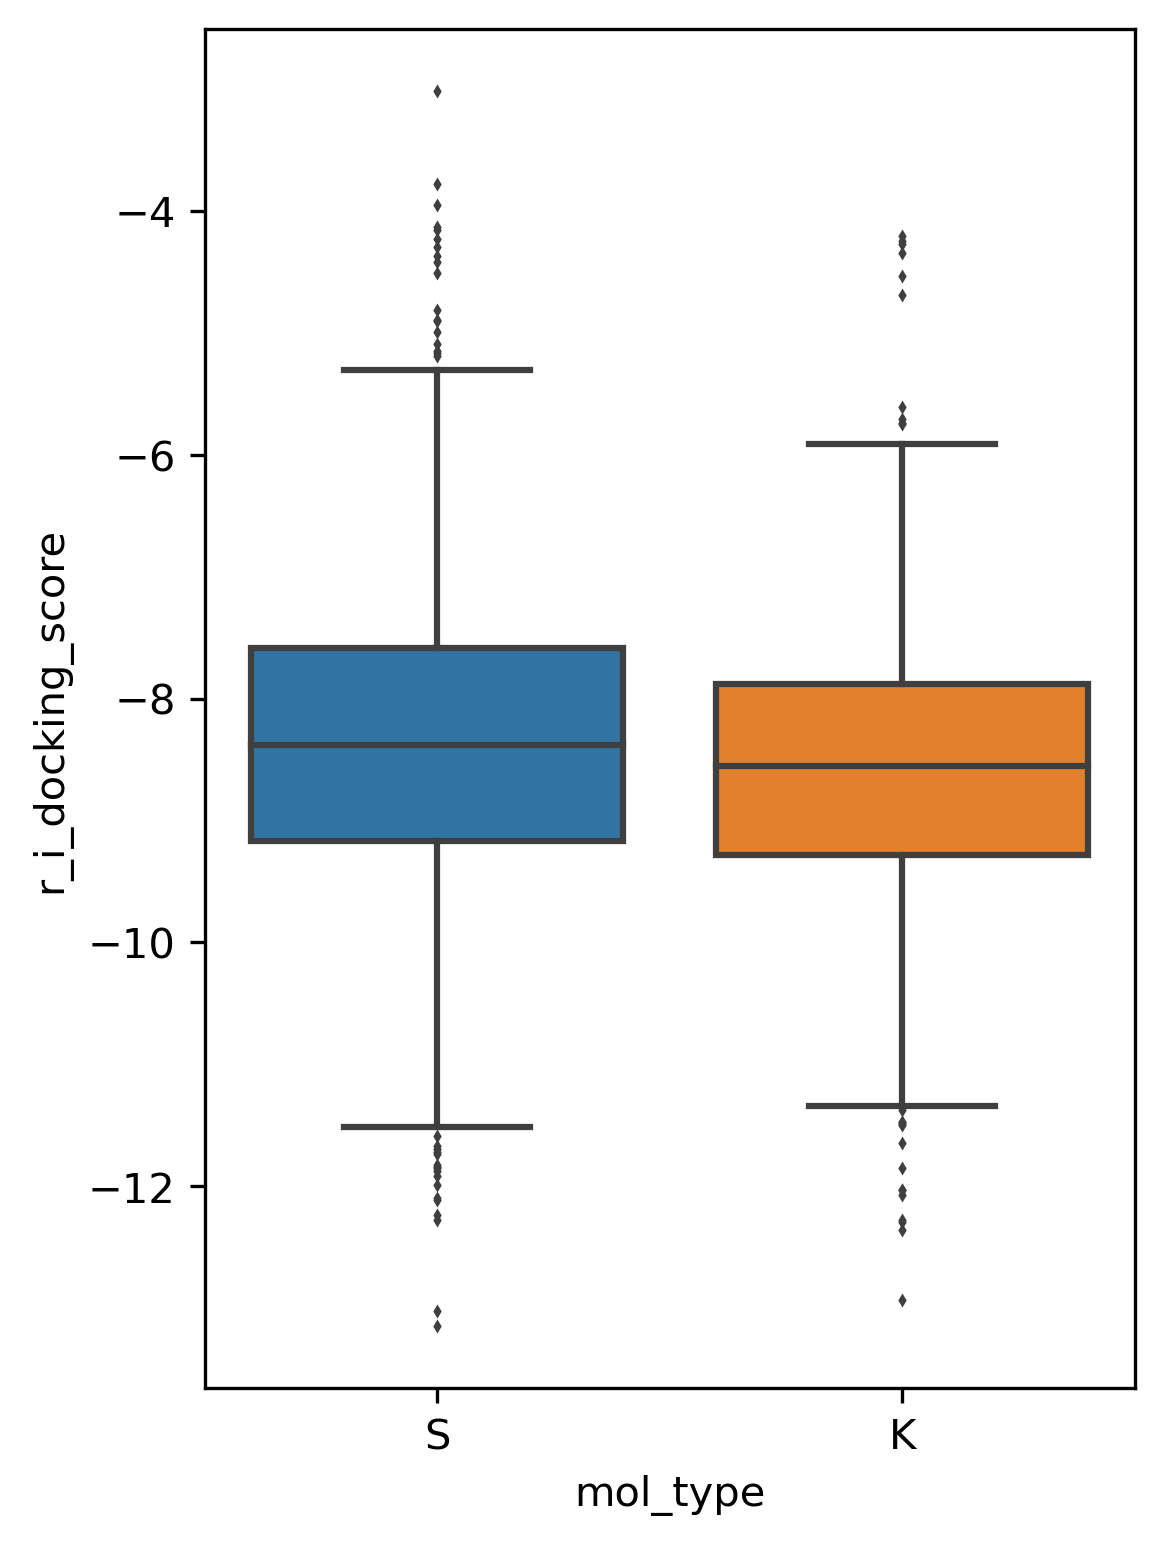

In [3]:
df=pd.read_csv('./braf_6v2u_m_ks_one.csv')
df.sort_values("r_i_docking_score",inplace=True)
print(df['mol_type'].value_counts())
count_sum(df)
plt.figure(figsize=(4,6),dpi=300)
sns.boxplot(x="mol_type",y="r_i_docking_score",data=df,fliersize=1)
#plt.title("不同船舱等级乘客船票价格箱线图(对数变换后)",fontsize="xx-large",color="#DE0052")
plt.show()

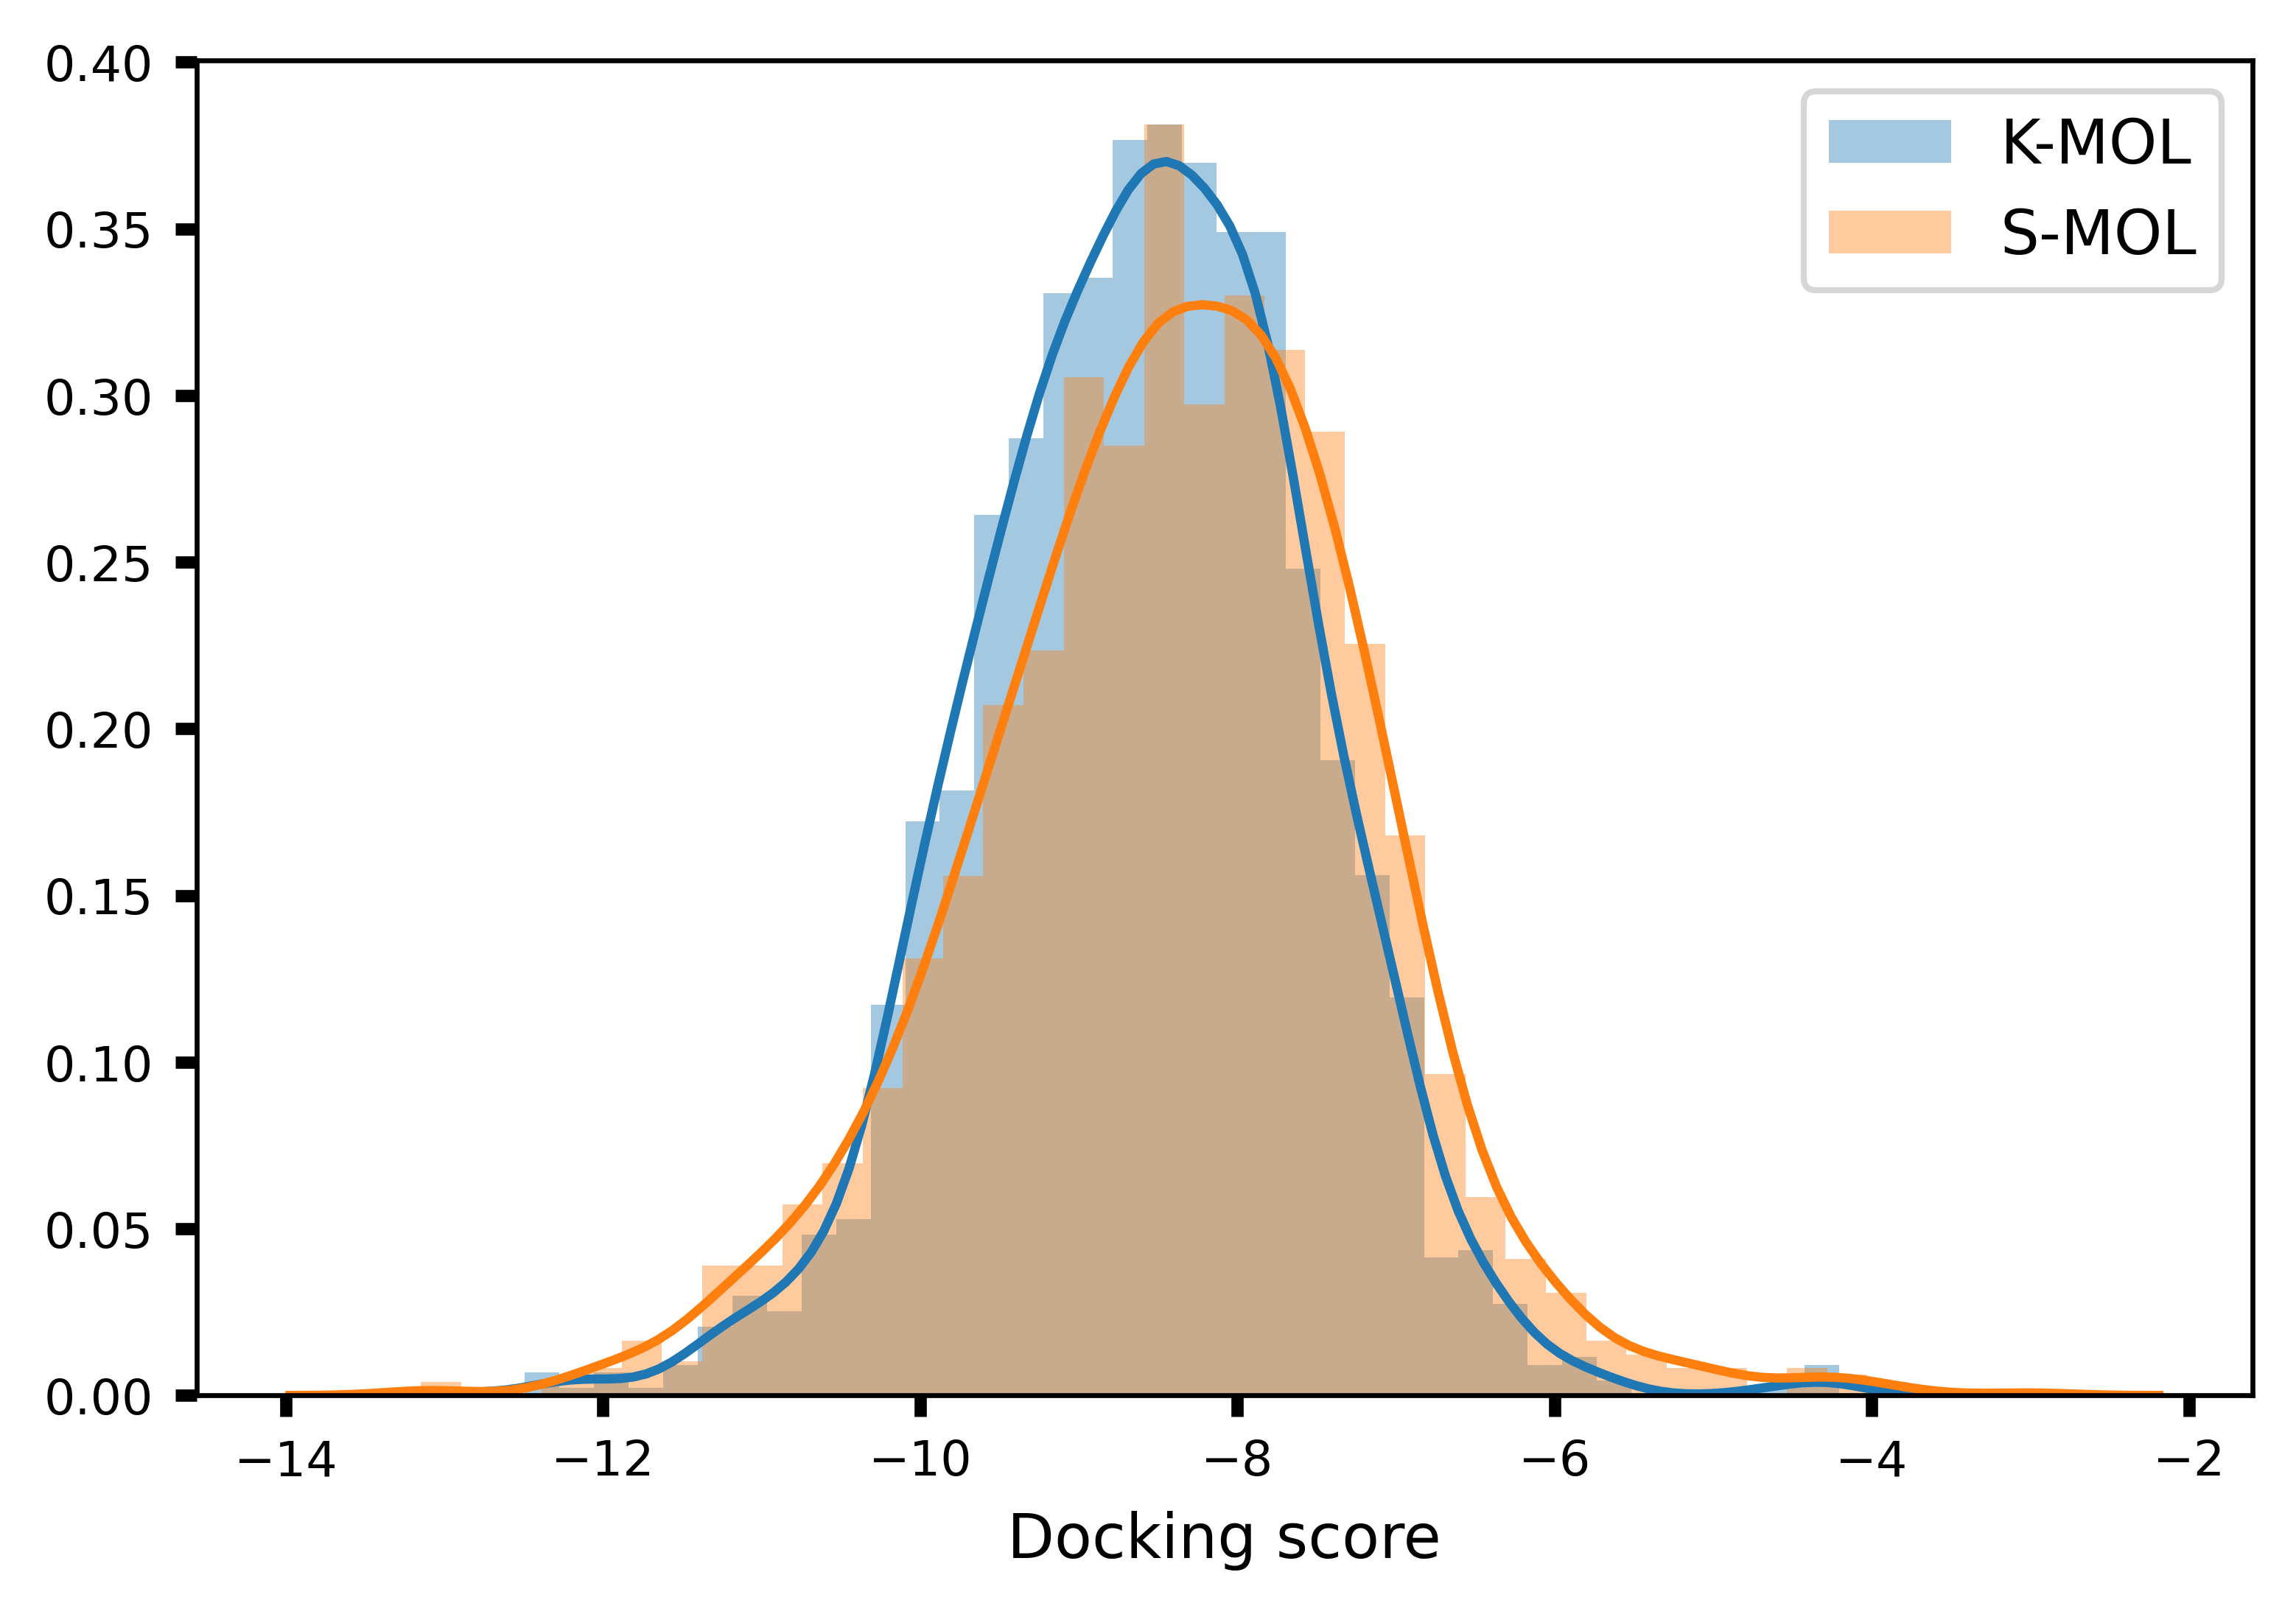

In [9]:
df_k = df[df['mol_type']=='K']
df_s = df[df['mol_type']=='S']

plt.figure(figsize=(6, 4), dpi=600)

k_simi = np.array(df_k["r_i_docking_score"])
k_simi = k_simi.flatten()
s_simi = np.array(df_s["r_i_docking_score"])
s_simi = s_simi.flatten()

'''sns.kdeplot(c_simi,label="Chembl")
sns.kdeplot(k_simi,label="K-MOL")
sns.kdeplot(s_simi,label="S-MOL")'''

sns.distplot(k_simi,norm_hist=False)
sns.distplot(s_simi,norm_hist=False)
plt.xlabel('Docking score',fontsize=10)

plt.legend(["K-MOL","S-MOL"],fontsize=10)
plt.tick_params('both',width=2,labelsize=8)
#plt.savefig('./wt_choose_distribution.tiff')
plt.show()

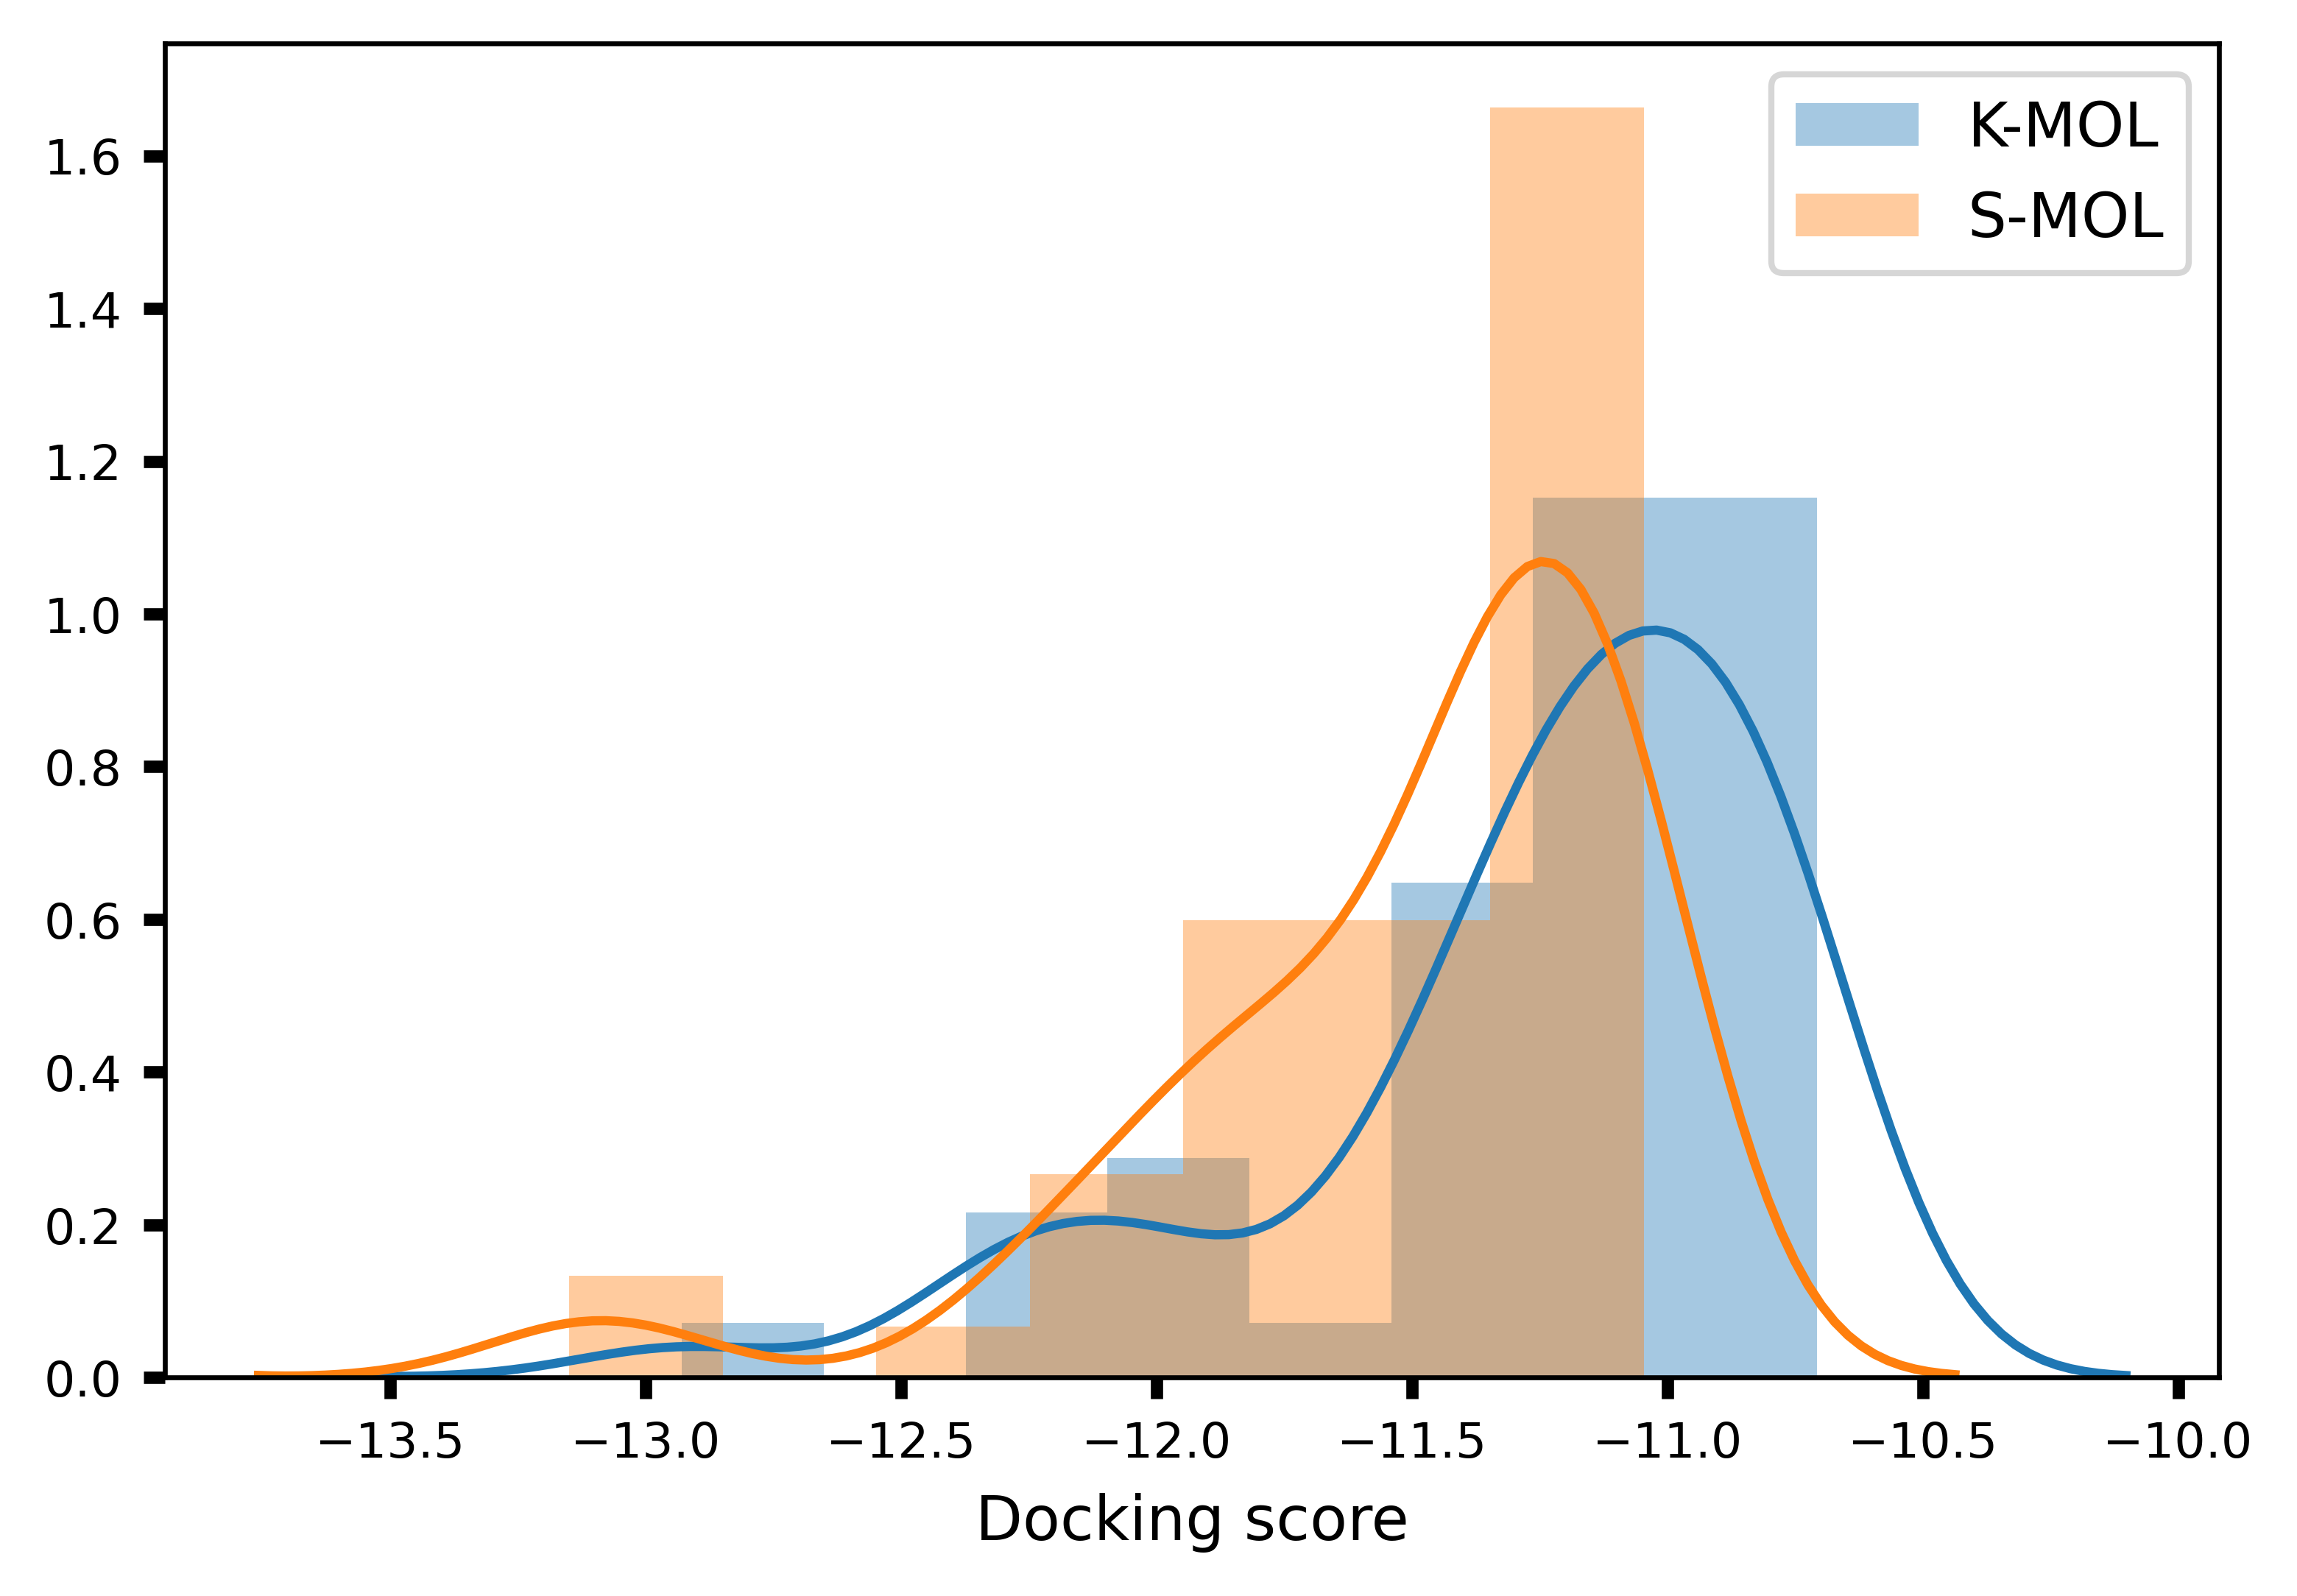

In [14]:
df_k_t500 = df[df['mol_type']=='K'].head(100)
df_s_t500 = df[df['mol_type']=='S'].head(100)
plt.figure(figsize=(6, 4), dpi=600)

k_simi = np.array(df_k_t500["r_i_docking_score"])
k_simi = k_simi.flatten()
s_simi = np.array(df_s_t500["r_i_docking_score"])
s_simi = s_simi.flatten()

sns.distplot(k_simi,norm_hist=False)
sns.distplot(s_simi,norm_hist=False)
plt.xlabel('Docking score',fontsize=10)
plt.legend(["K-MOL","S-MOL"],fontsize=10)
plt.tick_params('both',width=2,labelsize=8)
#plt.savefig('./wt_choose_distribution.tiff')
plt.show()

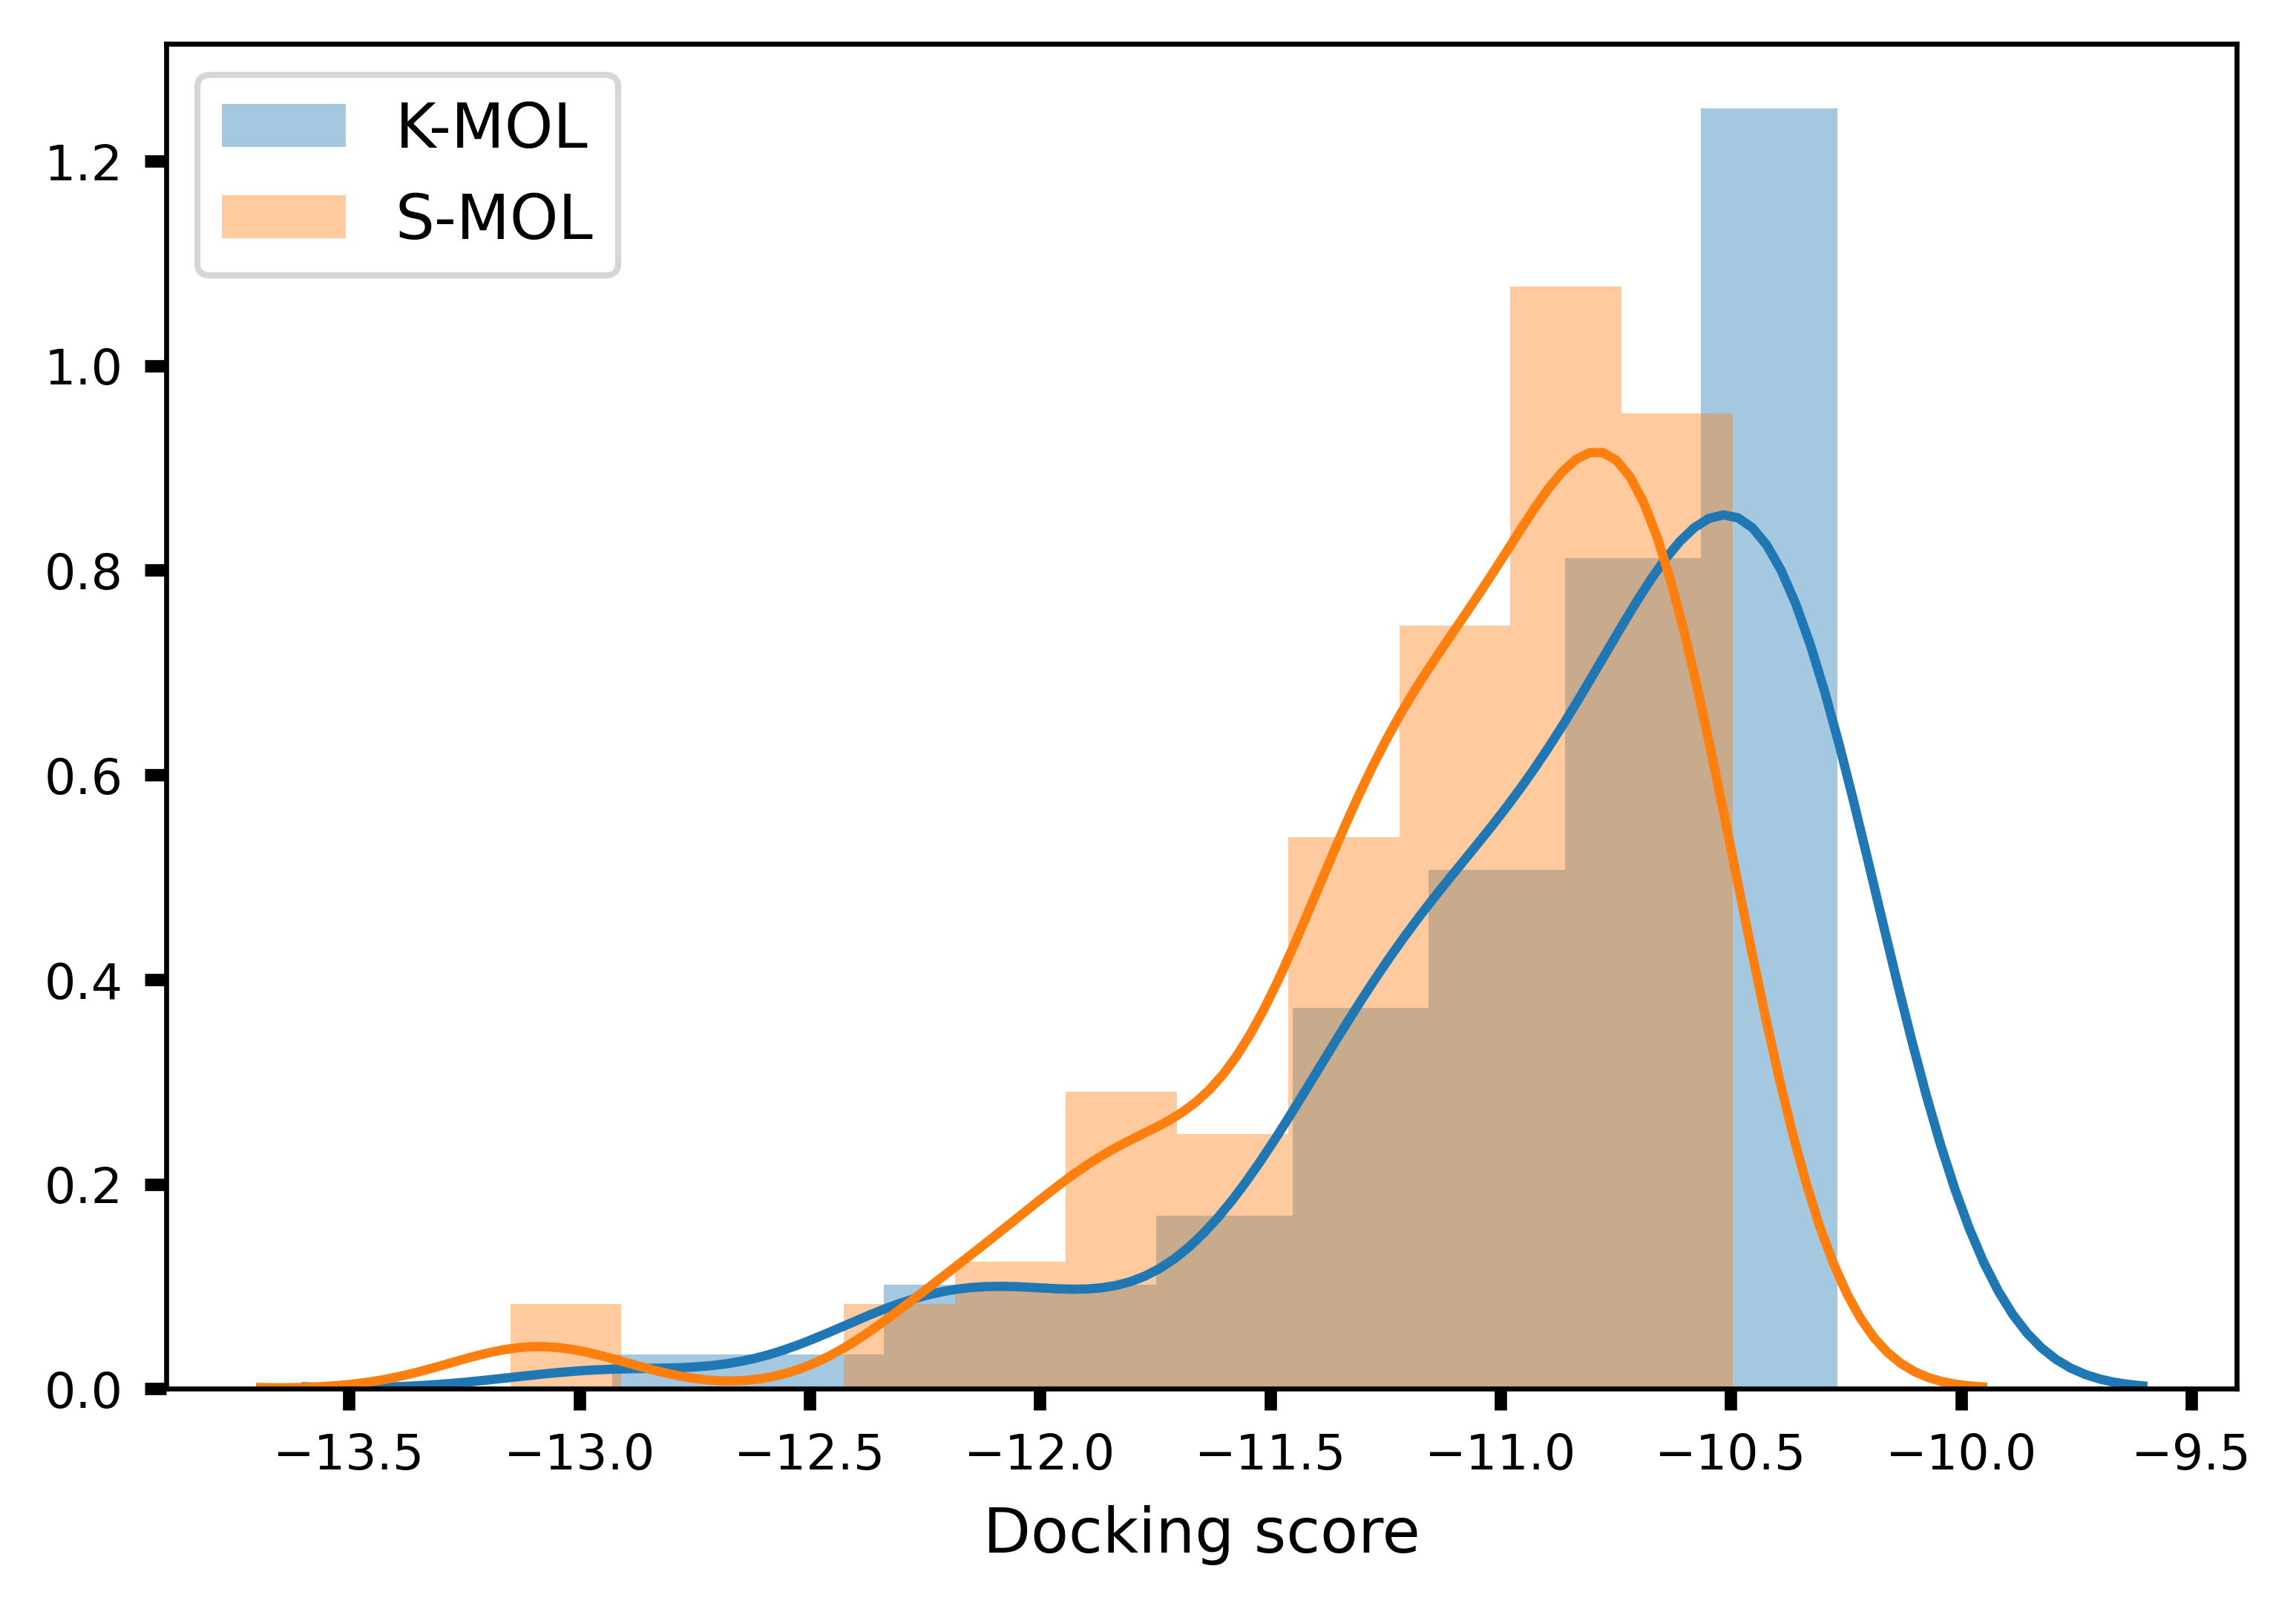

In [15]:
def draw_top(topnum):
    df_k_t500 = df[df['mol_type']=='K'].head(topnum)
    df_s_t500 = df[df['mol_type']=='S'].head(topnum)
    plt.figure(figsize=(6, 4), dpi=600)

    k_simi = np.array(df_k_t500["r_i_docking_score"])
    k_simi = k_simi.flatten()
    s_simi = np.array(df_s_t500["r_i_docking_score"])
    s_simi = s_simi.flatten()

    sns.distplot(k_simi,norm_hist=False)
    sns.distplot(s_simi,norm_hist=False)
    plt.xlabel('Docking score',fontsize=10)
    plt.legend(["K-MOL","S-MOL"],fontsize=10)
    plt.tick_params('both',width=2,labelsize=8)
    plt.savefig('./dock_score_top%s.tiff'%topnum)
    plt.show()
draw_top(100)